## EDA of MILK QUALITY DATASET

In [52]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### **Importing Data and EDA**

In [53]:
df = pd.read_csv("milknew.csv")

In [54]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [56]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [57]:
df.shape

(1059, 8)

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


<AxesSubplot:>

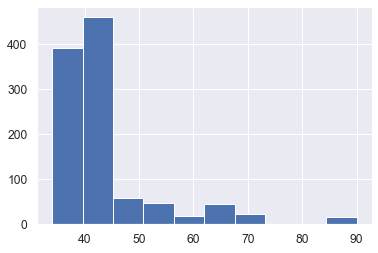

In [59]:
df.Temprature.hist()

<AxesSubplot:>

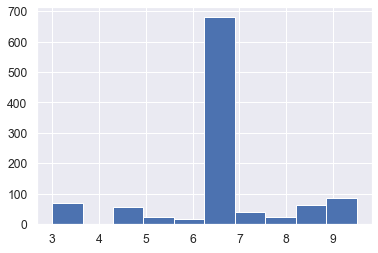

In [60]:
df.pH.hist()

In [61]:
df.Grade.value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

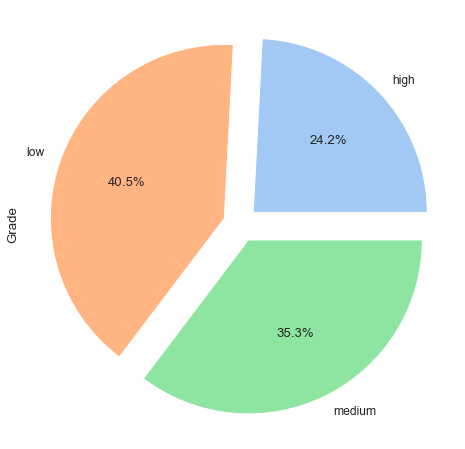

In [62]:
plt.figure(figsize=(8,8))
palette_color = sns.color_palette('pastel')
explode = [0.1, 0.1, 0.1]
df.groupby('Grade')['Grade'].count().plot.pie(colors=palette_color,explode=explode, autopct="%1.1f%%");

<AxesSubplot:>

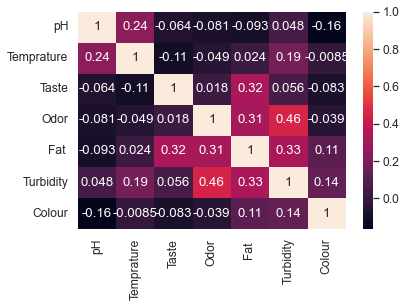

In [63]:
sns.heatmap(df.corr(),annot=True)

### **Feature engineering**

In [64]:
from sklearn import preprocessing

In [65]:
label_encoder = preprocessing.LabelEncoder()


In [66]:
#transform Grade in numerical numbers using label encoder
df['Grade']= label_encoder.fit_transform(df['Grade'])


In [67]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


In [68]:
all_features = ['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']
continuous_features = ['pH', 'Temprature', 'Colour']
binary_features = ['Taste', 'Odor', 'Fat ', 'Turbidity']

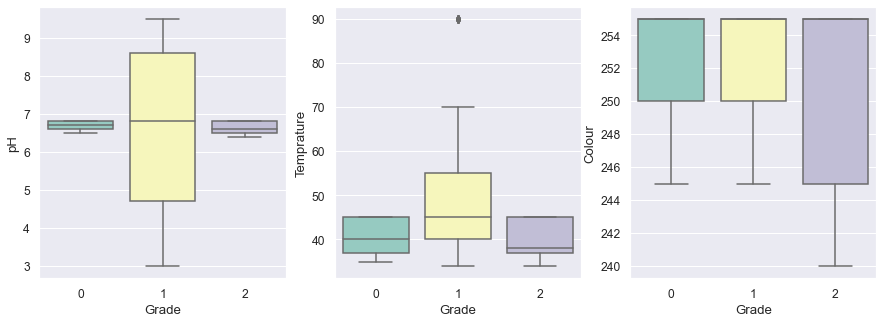

In [69]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for var, subplot in zip(continuous_features, ax.flatten()):
    sns.boxplot(x='Grade', y=var, data=df, ax=subplot, palette='Set3')

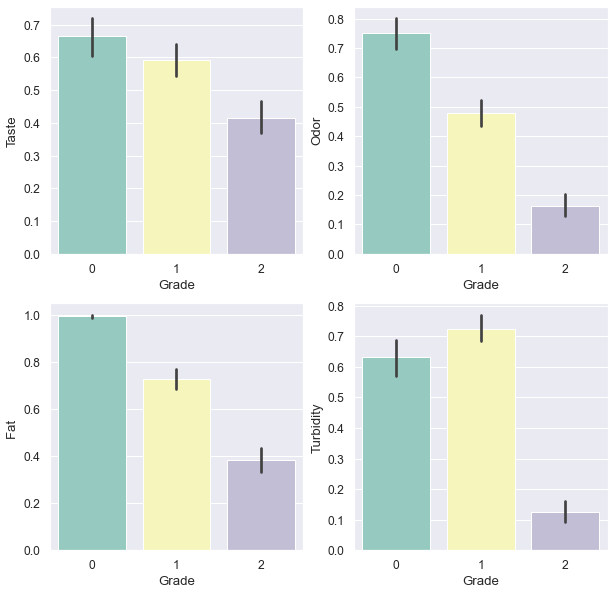

In [70]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for var, subplot in zip(binary_features, ax.flatten()):
    sns.barplot(x='Grade', y= var, data=df, ax=subplot, palette='Set3')

In [71]:
df_slice = df.iloc[45:48]
df_brain_storm=df_slice.drop('Grade', axis = 1)
df_brain_storm

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
45,6.5,36,0,0,0,0,247
46,6.6,38,0,0,0,0,255
47,6.8,45,1,1,1,0,245
